In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('2020My_SubsPt1.csv', index_col=0)

## Round 1

I was able to pull 681000 comments from the following subreddits:
* leagueoflegends
* globaloffensive
* calpoly
* programmerhumor
* hiphopheads
* seattlewa
* indieheads
* malefashionadvice
* frugalmalefashion
* fantanoforever
* mechanicalkeyboards
* android
* cscareerquestions
* soccer
* nba
* movies
* kanye

Between March 1st and March 7th, 2020.

This took me around 50 minutes of calling the Pushshift API because I can only call 1000 comments at a time



In [4]:
df_index = pd.Series(df.index).astype(str)

strange = df_index[~df_index.str.isnumeric()].index

df.iloc[strange]['body']

Some WHYPHY from 22 Jump Street                   NaN
Roddy Piper's shades from They Live               NaN
Tony Clifton's hair piece from Man On The Moon      1
https://s.click.aliexpress.com/e/oN0SQmmy           1
Name: body, dtype: object

,all_awardings,associated_award,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,parent_id,permalink,retrieved_on,score,send_replies,steward_reports,stickied,subreddit,subreddit_id,total_awards_received
0,[],NaN,bellowingbullfinches,NaN,NaN,NaN,[],NaN,NaN,NaN,...,t1_fcohuem,/r/movies/comments/ehusg6/ford_v_ferrari_is_a_...,1.577837e+09,1.0,True,[],False,movies,t5_2qh3s,0.0
1,[],NaN,Cryptic0677,NaN,NaN,mxbrown,"[{'e': 'text', 't': 'MK Disco'}]",2d5b2cda-f2da-11e2-bf5f-12313d05241f,MK Disco,dark,...,t1_fbyedyq,/r/MechanicalKeyboards/comments/ef5bu3/khu_spi...,1.577837e+09,1.0,True,[],False,MechanicalKeyboards,t5_2ugo7,0.0
2,[],NaN,shponglespore,NaN,NaN,NaN,[],NaN,NaN,NaN,...,t1_fcomrlu,/r/Android/comments/ei3z7i/its_almost_2020_and...,1.577837e+09,1.0,True,[],False,Android,t5_2qlqh,0.0
3,[],NaN,junon,NaN,NaN,NaN,[],NaN,NaN,NaN,...,t1_fcold29,/r/movies/comments/ei5g15/i_just_finished_watc...,1.577837e+09,1.0,True,[],False,movies,t5_2qh3s,0.0
4,[],NaN,kingbane2,NaN,NaN,NaN,[],NaN,NaN,NaN,...,t3_ei4uyv,/r/movies/comments/ei4uyv/movies_you_feel_are_...,1.577837e+09,1.0,True,[],False,movies,t5_2qh3s,0.0


movies                 357885
leagueoflegends        323033
hiphopheads            127680
GlobalOffensive         78385
MechanicalKeyboards     68091
ProgrammerHumor         59335
Android                 50674
cscareerquestions       41775
malefashionadvice       26578
indieheads              25791
Kanye                   24539
frugalmalefashion       17237
fantanoforever           6734
CalPoly                  1261
Name: subreddit, dtype: int64

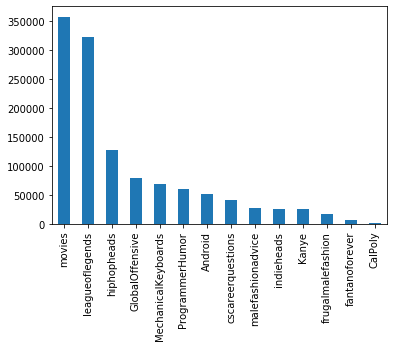

In [5]:
display(df.head())
display(df['subreddit'].value_counts())
df['subreddit'].value_counts().plot.bar()

In [6]:
comment_text = df['body'].dropna()

In [4]:
vec = TfidfVectorizer(max_features=100)

vec.fit(comment_text)
tf_idf = vec.transform(comment_text)

In [5]:
pd.DataFrame(tf_idf.todense(), columns=vec.get_feature_names())

,about,all,also,an,and,any,are,as,at,be,...,were,what,when,who,why,will,with,would,you,your
0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.000000,0.134832,0.0,0.214991,0.170157,0.08035,0.183279,0.197573,0.064809,0.116142,...,0.0,0.267870,0.000000,0.0,0.0,0.0,0.058519,0.0,0.197147,0.145542
2,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.578478,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.328426,0.000000,...,0.0,0.000000,0.365746,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.279619,0.269015,0.0,0.000000,0.000000,0.00000,0.000000,0.262796,0.258613,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.233514,0.0,0.196672,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680987,0.000000,0.000000,0.0,0.000000,0.250765,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.394769,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
680988,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
680989,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
680990,0.000000,0.424192,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [6]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

cosine_similarity(tf_idf)

MemoryError: 